## Convolutional Neural Networks (CNN's)
Powerful deep networks that are widely used in image related tasks like - Image Recognition, Segmenation, Computer Vision etc Input to these networks are images!

<img src="./images/cnn2.jpeg"
     alt="pokemon_back.jpg"
     style="width: 400px;" />


## Why do we need CNN's
<img src="./images/cnn.jpeg"
     alt="pokemon_back.jpg"
     style="width: 400px;" />


- Bcoz MLP's have some disadvantages: like<br>1. **Overfitting** due to too many weight parameters fot large number of pixel features.
<br>2. MLP's fail to handle variations in images like translational varianve, rotational variance, Size variance, contrast variance.

<img src="./images/invariance.png"
     alt="pokemon_back.jpg"
     style="width: 400px;" />

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
plt.style.use('seaborn')

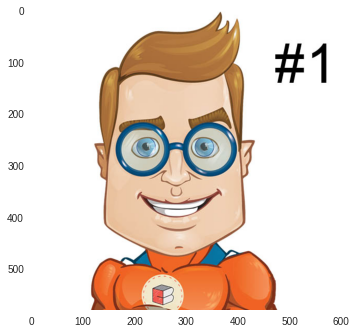

In [8]:
img_ = cv2.imread("./images/cody2.jpg")  # cv2 reads in BGR gormat
img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB) # convert to RGB

plt.imshow(img_) # plt shows in RGB format
plt.grid(False)
# plt.axis('off')
plt.show()

In [10]:
def draw_img(img, title="Image"):   # takes img, title as input
    plt.figure(figsize=(6,4))
    plt.imshow(img, cmap="gray")  ## pass grayscale map, bcoz we need it earlier
    plt.axis("off")    
    plt.title(title+str(img.shape))  ## In title print title and shape of image
    plt.show()

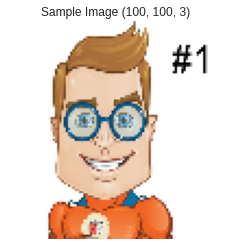

In [11]:
img_ = cv2.imread("./images/cody2.jpg")  # cv2 reads in BGR gormat
img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB) # convert to RGB
img = cv2.resize(img_, (100,100))

draw_img(img, title="Sample Image ")

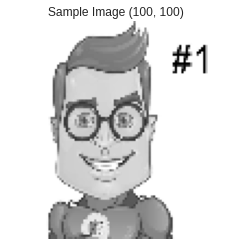

In [13]:
img_ = cv2.imread("./images/cody2.jpg")  # cv2 reads in BGR gormat
img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY) # convert to gray
gray_img = cv2.resize(img_, (100,100))

draw_img(gray_img, title="Sample Image ")

## Applying Convolution now:
- In CNN, filters are automativally learned by the model to get the features.


In [16]:
def convolution(img, img_filter):
    W,H = img.shape   ## width and height of image
    
    f = img_filter.shape[0]  # considering a square filter
    new_img = np.zeros((W-f+1, H-f+1)) # Create array to store output image 
    ## try below code on copy pen
    ## 2 loops are to iterate over every row and col of output image
    for row in range(W-f+1):
        for col in range(H-f+1):
            # instead of using 2 more for loops, we can use direct vectorization like below:
            new_img[row,col] = np.sum(img[row:row+f,col:col+f]*img_filter) 
            # '*' means element wise multiplication and then we add all elements
## there may be a case when above result becomes >255 or <0. But python only takes value in
# range 0-255. So we can convert >255 to 255 and <0 to 0 as below:
            if new_img[row,col] > 255:
                new_img[row,col] = 255
            elif new_img[row,col] < 0:
                new_img[row,col] = 0
    
    return new_img # this is activation map.

In [17]:
blur_filter = np.ones((3,3))/9.0  # this is a 3,3 blur filter
blur_filter

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

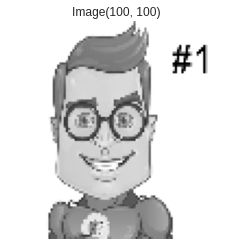

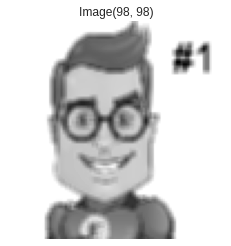

In [19]:
output1 = convolution(gray_img, blur_filter)
draw_img(gray_img)  ## original image
draw_img(output1)   ## image after appying blur filter

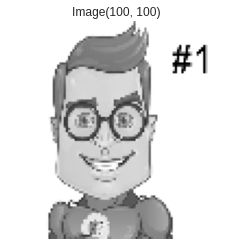

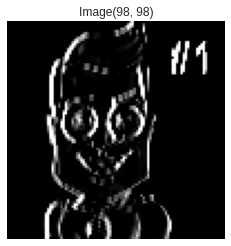

In [20]:
## let us see edge filter now:
edge_filter = np.array([[1,0,-1],  # this is a vertical edge filter in particular
                       [1,0,-1],
                       [1,0,-1]])  
output2 = convolution(gray_img, edge_filter)
draw_img(gray_img)  ## original image
draw_img(output2)   ## image after appying edge filter

#### Extracting Features of image using Filters

### Convolution Layer
- contains various filters
- each filter extracts different kinds of features and gives 1 activation map

### Buzzwords in CNN's
- Convolution Layer
- Valid vs Same Convolution
- Padding
- Stride
- Filters/Kernels
- Pooling (Average/Maxpooling)

### Stride
- Filters can have different size as well as movement
- Stride defines how a filter should move across the image
- No of pixels we skip each time is called stride

**Input and Output Sizes**:
(assuming 0 padding)
$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$
$$ n_C = n_{C_{prev}}$$


### Padding
applting padding if size decreases during convolution.
**Input and Output Sizes after Convolution**:
(with padding)



$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

Image shape initially:  (100, 100, 3)


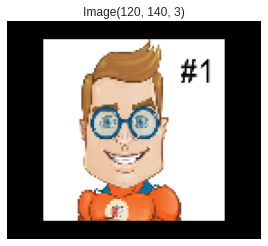

In [30]:
print("Image shape initially: ",img.shape)  ## shape initially 

#Padding to this image
pad_img = np.pad(img,((10,10),(20,20),(0,0)),'constant',constant_values=0)
# here (10,10) is to give padding along x-axis, 20,20 along y-axis and 0,0 along channels
draw_img(pad_img)

Image shape initially:  (100, 100, 3)


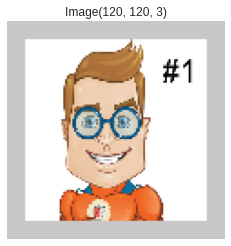

In [31]:
print("Image shape initially: ",img.shape)  ## shape initially 

#Padding to this image
pad_img = np.pad(img,((10,10),(10,10),(0,0)),'constant',constant_values=200)
# here (10,10) is to give padding along x-axis, 20,20 along y-axis and 0,0 along channels
draw_img(pad_img)

## Pooling Layers
- Pooling is performed after Convolution Operation
- Two types of pooling layer - Average Pooling and Max Pooling

- **Max-pooling layer**: slides an ($f, f$) window over the input and stores the max value of the window in the output.

- **Average-pooling layer**: slides an ($f, f$) window over the input and stores the average value of the window in the output.



### Implement Pooling Operation


In [36]:
## this is same array as given in image of previous cell
X = np.array([[1,0,2,3],
              [4,6,6,8],
              [3,1,1,0],
              [1,2,2,4]])

def pooling(X,mode="max"):
    stride = 2 
    f = 2  # let us take filter_size=2
    H,W = X.shape  # Height and width of image
    
    HO = int((H-f)/stride) + 1  # height of output image as defined in above notes
    WO = int((W-f)/stride) + 1  # width of output image
    
    output = np.zeros((HO,WO))  # create a matrix to store output of size HO, WO
    
    # try this with copy pen by taking some ecample what it means 
    for i in range(HO): ## i, j are to iterate over size of output filter
        for j in range(WO):
# for each value in output, we make jump of stride. Or we can say i*stride 
# so we go from [i*stride: i*stride+f] and similarly for column [j*stride : j*stride+f]
            r_start = i*stride 
            r_end = r_start + f
            c_start = j*stride
            c_end = c_start + f
            
            X_slice = X[r_start:r_end,c_start:c_end]
            if mode=="max":  # max pooling
                output[i][j] = np.max(X_slice)
            else:            # average pooling
                output[i][j] = np.mean(X_slice)
                
    return output

In [35]:
pooling_output = pooling(X)
print(pooling_output)

[[6. 8.]
 [3. 4.]]


## General CNN Architecture

<img src="./images/arch.png"
     alt="cat.jpg"
     style="width: 600px;" />